In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('model_training_data.csv')
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              399 non-null    object 
 1   Title             178 non-null    object 
 2   Content           513 non-null    object 
 3   Author            253 non-null    object 
 4   Corporate Author  510 non-null    object 
 5   Class             464 non-null    float64
dtypes: float64(1), object(5)
memory usage: 24.5+ KB


In [4]:
dataset.head(10)

,Date,Title,Content,Author,Corporate Author,Class
0,14/06/2024,"UN CHIEF OFFERS CONDOLENCES ON CHILIMA, 8 OTHE...",United Nations (UN) Secretary General Antonio ...,The Nation,National Publications Limited,1.0
1,NaN,"ELDRERLY, CHILD NUTRITION MATTER",Former president Joyce Banda has emphasized th...,NaN,National Publications Limited,1.0
2,31/08/2022,APM BLAMES CHAKWERA ON POWER BLACKOUTS,Immediate past president Mutharika weighed in ...,Chikondi Moyo,National Publications Limited,1.0
3,FEB 9 2020,NaN,MCP president Lazarus Chakwera has vowed to el...,NaN,Times 360 Malawi,1.0
4,20/12/2022,"APM, JB in Verbal Tirade",Former president Joyce Banda and her predecess...,Precious Kumbani,National Publications Limited,1.0
5,12/4/2018,NaN,A group of disgruntled Malawi Congress Party a...,NaN,Zodiak Online,NaN
6,FEB 3 2020,NaN,All five judges presiding over the case have u...,Sharon Chirwa,Times 360 Malawi,1.0
7,FEB 11 2020,NaN,MEC Commissioner Moffat Banda states that he w...,NaN,Times 360 Malawi,1.0
8,NaN,JB PUNCHES HOLES IN FISP,People's Party (PP) President Joyce Banda has ...,NaN,National Publications Limited,1.0
9,1/10/2020,NaN,Chief Election Observer for the EU to Malawi M...,NaN,Zodiak Online,NaN


In [6]:
dataset.isnull().sum()

Date                121
Title               342
Content               7
Author              267
Corporate Author     10
Class                56
dtype: int64

In [7]:
dataset['Content'].dropna(inplace=True) #drop all rows with empty content

In [8]:
dataset['Title'] = dataset['Title'].fillna('')
dataset['Author'] = dataset['Author'].fillna('Unknown')

In [10]:
no_date_dataset = dataset.drop('Date', axis=1)

In [11]:
no_date_dataset.head(10)

,Title,Content,Author,Corporate Author,Class
0,"UN CHIEF OFFERS CONDOLENCES ON CHILIMA, 8 OTHE...",United Nations (UN) Secretary General Antonio ...,The Nation,National Publications Limited,1.0
1,"ELDRERLY, CHILD NUTRITION MATTER",Former president Joyce Banda has emphasized th...,Unknown,National Publications Limited,1.0
2,APM BLAMES CHAKWERA ON POWER BLACKOUTS,Immediate past president Mutharika weighed in ...,Chikondi Moyo,National Publications Limited,1.0
3,,MCP president Lazarus Chakwera has vowed to el...,Unknown,Times 360 Malawi,1.0
4,"APM, JB in Verbal Tirade",Former president Joyce Banda and her predecess...,Precious Kumbani,National Publications Limited,1.0
5,,A group of disgruntled Malawi Congress Party a...,Unknown,Zodiak Online,NaN
6,,All five judges presiding over the case have u...,Sharon Chirwa,Times 360 Malawi,1.0
7,,MEC Commissioner Moffat Banda states that he w...,Unknown,Times 360 Malawi,1.0
8,JB PUNCHES HOLES IN FISP,People's Party (PP) President Joyce Banda has ...,Unknown,National Publications Limited,1.0
9,,Chief Election Observer for the EU to Malawi M...,Unknown,Zodiak Online,NaN


In [12]:
# combining features into one
new_dataset = no_date_dataset

In [13]:
new_dataset['combine_text'] = new_dataset['Title'] + ' ' + new_dataset['Content'] + ' ' + new_dataset['Author'] + ' ' + new_dataset['Corporate Author']

In [14]:
df = new_dataset

In [15]:
df['Class'].value_counts()

Class
1.0    416
0.0     48
Name: count, dtype: int64

In [16]:
df['Class'].isnull().sum()

56

In [17]:
df['Class'] = df['Class'].fillna(1)

In [145]:
df.tail(10)

,Title,Content,Author,Corporate Author,Class,combine_text
510,,Demonstrations in Mzuzu have begun.,Sam Kalimira,Times 360 Malawi,1.0,Demonstrations in Mzuzu have begun. Sam Kalim...
511,Group decries low usage of e-sources,Malawi Library and Information Consortium (Mal...,Ayamba Kandondo,National Publications Limited,1.0,Group decries low usage of e-sources Malawi Li...
512,,DPP Director of Operations Charles Mchacha has...,Zuleika Nanguwo,Zodiak Online,1.0,DPP Director of Operations Charles Mchacha ha...
513,KUMPOTO NDI KU CHIPINDA CHA DPP | MUTHALIKA\r,Mtsogoleri wa chipani cha DPP Prof Peter Mutha...,Unknown,Times Exclusive,0.0,KUMPOTO NDI KU CHIPINDA CHA DPP | MUTHALIKA\r ...
514,,Chief Justice Andrew Nyirenda has lodged a com...,Unknown,Times 360 Malawi,1.0,Chief Justice Andrew Nyirenda has lodged a co...
515,,"Regarding President Peter Mutharika’s appeal, ...",Faith Kadzanja,Times 360 Malawi,1.0,"Regarding President Peter Mutharika’s appeal,..."
516,Chakwera wants transformational politics,Malawi congress party (MCP) president Lazarus ...,Joy Kakhona,National Publications Limited,1.0,Chakwera wants transformational politics Malaw...
517,,"HRDC Vice Chairperson for the South, Masauko T...",Jameson Chauluka,Times 360 Malawi,1.0,"HRDC Vice Chairperson for the South, Masauko ..."
518,,DPP protesters clash with police,Unknown,Times 360 Malawi,1.0,DPP protesters clash with police Unknown Time...
519,,Businessman Thom Mpinganjira was released from...,Unknown,Times 360 Malawi,1.0,Businessman Thom Mpinganjira was released fro...


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

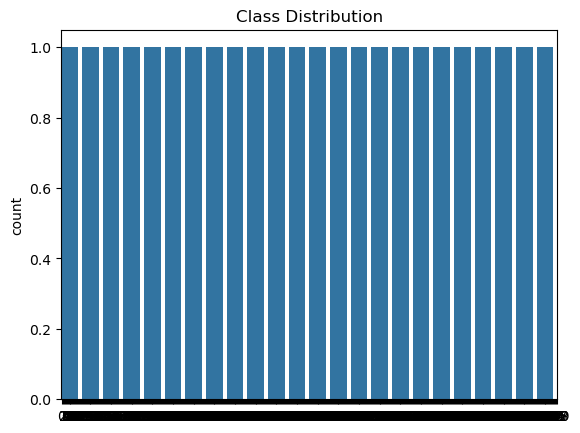

In [19]:
sns.countplot(df['Class'])
plt.title('Class Distribution')
plt.show()

In [20]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 403.5 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.4 kB 368.6 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.4 kB 368.6 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.4 kB 387.0 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.4 kB 479.2 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/301.4 kB 515.5 kB/s eta 0:0

In [21]:
from collections import Counter
from wordcloud import WordCloud

In [22]:
df['combined_text'] = df['Title'] + ' ' + df['Content'] + ' ' + df['Author'] + ' ' + df['Corporate Author']
df['combined_text'] = df['combined_text'].fillna('')
df['combined_text'] = df['combined_text'].astype(str)

real_news = df[df['Class'] == 1]['combined_text'].str.cat(sep=' ')
fake_news = df[df['Class'] == 0]['combined_text'].str.cat(sep=' ')

In [26]:
real_wc = WordCloud(width=1000, height=500).generate(real_news)
fake_wc = WordCloud(width=1000, height=500).generate(fake_news)

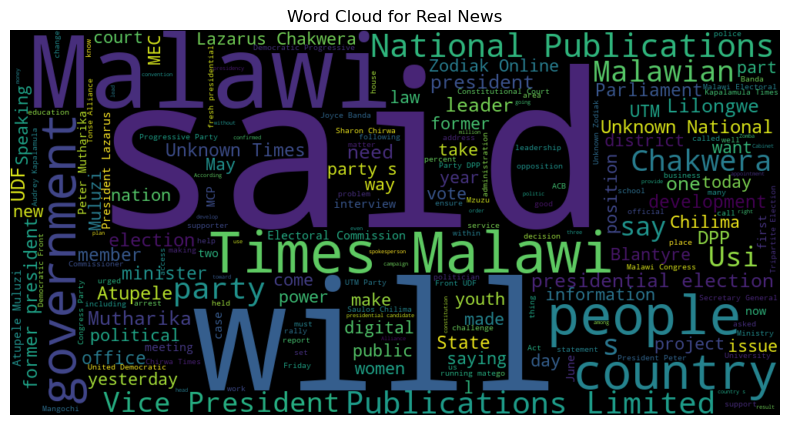

In [27]:
plt.figure(figsize=(10, 5))
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

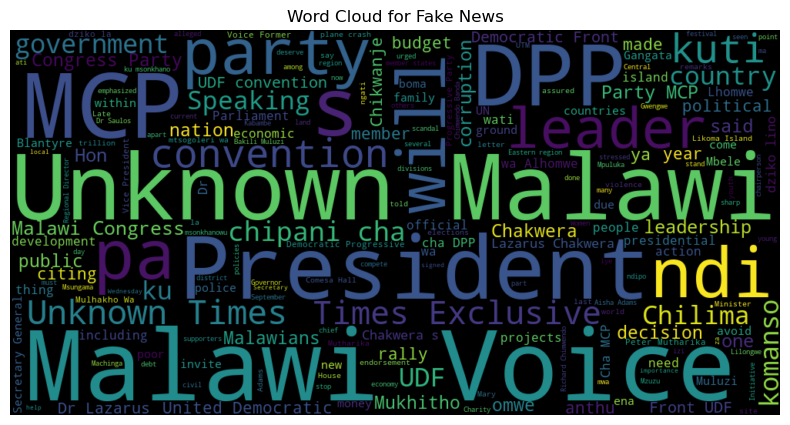

In [28]:
plt.figure(figsize=(10, 5))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

In [25]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OTP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [155]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['preprocessed_text'])

In [157]:
import pickle

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [158]:
from sklearn.model_selection import train_test_split

X = df['preprocessed_text']
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [159]:
print(X_train)

434                                         2371492.0360
436                                                ,.360
208    ().’282022,“”;“,,–.“18.”,9.,.“,..,”.,’,.“.,.”,...
332          ','-(),."....,,"..",.".,20,50.,."2.5..,",,.
220                                             ,“..”360
                             ...                        
71                                              ,“..”360
106                                  |''8..;..''.,'.'''.
270            --19.,-195000,.‘’389,..‘’,.,37000,’’.-19.
435                                               ',.360
102                                      70+,.,.....,?..
Name: preprocessed_text, Length: 416, dtype: object


In [160]:
print(y_train)

434    1.0
436    1.0
208    1.0
332    1.0
220    1.0
      ... 
71     1.0
106    0.0
270    1.0
435    1.0
102    0.0
Name: Class, Length: 416, dtype: float64


In [161]:
print(y_test)

275    1.0
93     1.0
6      1.0
167    1.0
90     0.0
      ... 
69     1.0
357    1.0
423    1.0
334    1.0
227    1.0
Name: Class, Length: 104, dtype: float64


In [162]:
print(y_test.unique())

[1. 0.]


In [163]:
y_test

275    1.0
93     1.0
6      1.0
167    1.0
90     0.0
      ... 
69     1.0
357    1.0
423    1.0
334    1.0
227    1.0
Name: Class, Length: 104, dtype: float64